<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

# Análisis y procesamiento de señales
## Augusto Ojeda-Matias Carbajal TS4: Primeras nociones de estimaciónes espectrales 

### Introducción teórica


El analisis espectral es una de las aplicaciones escencials del procesamiento digital de señales,este se trata del proceso de medir, estimar y caracterizar el contenido freciencial de las señales, tanto deterministicas como probabilsticas.

Para explicar teoricamente como se realiza el analisis, partiremos de la idea de que poseemos una frecuencia $x[n]$ muestreada con una frecuencia, a la cual llamaremos $\Omega_1$. En tiempo discreto esta señal tiene una DTFT que podemos escribir de esta manera:
$$X(\Omega)=\pi [\delta(\Omega-\Omega_1)+\delta(\Omega+\Omega_1)] (1) $$ 
Es decir la energia estara concentrada unicamente en $\pm\Omega_1$ $$ $$
A priori la DTFT nos permite analizar esta señal con precisión infinita en frecuencia, sin embargo esto no ocurre  ya que no tenemos señales de longitud infinita y que utilizamos versiones discretizadas de la DFTF al pasar por un ambito computacional, esto genera dos fuentes de ambiguedad el ventaneo de los datos y el muestreo de frecuencias.

De experiencias anteriores sabemos que modelar una señal de longitud finita $x[n]$ equivale a seleccionar un fragmento de la señal infinita. En otras palabras, esto implica multiplicar la señal original por una ventana, a la que llamaremos $w[n]$. En consecuencia, cuando analizamos una señal $x[n]$, en realidad estamos estudiando una señal modificada $x'[n]$, que puede expresarse de la siguiente manera:

$$
x'[n] = x[n] \cdot w[n] (2)
$$

En el dominio de las frecuencias, una multiplicacion se traduce en una convolucion del espectro original es decir que 
$$
X'[w] =\frac{1}{2\pi} X[w] * W[w] (3)
$$
Esto, como vimos, provoca que en lugar de concentrarse la energía en frecuencias puntuales, esta se "desparrame" a lo largo de un rango más amplio de frecuencias. De la teoría se desprende que la anchura del lóbulo principal es aproximadamente inversamente proporcional a la longitud de la ventana, mientras que la altura de los lóbulos secundarios en relación con el principal determina el nivel de fuga espectral (*leakage*). Esto implica un compromiso ventanas con lóbulos principales mas angostos permiten mayor resolucion espectral, mientras que ventanas con lóbulos secundarios bajos reducen la fuga espectral. 

Un segundo conjuntos de problemas en la estimación espectral pviene del muestreo del espectro, al utilizar la DFT o la FFT tanto la cantidad de muestras $N$, como la frecuencia de muestreo $f_s$ determinan la capacidad de distinguis componentes espectrales cercanos, esto es lo que conocemos como la resolucion espectral.

En el marco de la estimación espectral no paramétrica, resulta habitual diseñar estimadores de amplitud y frecuencia a partir de la transformada de Fourier de la señal muestreada y ventaneada.

Un estimador de amplitud $\hat{a}_1^i$ puede definirse como el valor absoluto del espectro de la señal, evaluado en la frecuencia de interés $\Omega_1$:

$$
\hat{a}_1^i = |X_w^i(\Omega_1)| = \big| \mathcal{F}\{ x(n) \cdot w_i(n) \} \big|,(4)
$$

donde $x(n)$ es la señal observada y $w_i(n)$ la ventana aplicada. Este estimador permite cuantificar la magnitud del componente espectral dominante, teniendo en cuenta que la elección de la ventana afecta tanto la precisión como el sesgo de la estimación.

Por otro lado, el estimador de frecuencia $\hat{\Omega}_1^i$ se obtiene localizando la posición en el eje de frecuencias donde el espectro presenta su máximo valor:

$$
\hat{\Omega}_1^i = \underset{\Omega}{\mathrm{arg\,max}} \{ |X_w^i(\Omega)| \}.(5)
$$

Este procedimiento permite identificar la frecuencia más significativa presente en la señal, constituyendo la base para la detección de tonos sinusoidales en contextos prácticos.


En presencia de ruido aditivo, estos estimadores mantienen su utilidad, aunque presentan limitaciones:

- El estimador de amplitud refleja no solo la magnitud del tono, sino también la contribución del ruido en el entorno frecuencial. Por esta razón, es sensible a la fuga espectral y a la elección de la ventana.  
- El estimador de frecuencia, basado en el máximo del espectro, puede verse afectado por fluctuaciones debidas al ruido.

En conjunto, ambos estimadores constituyen una herramienta fundamental para el análisis de señales ruidosas: el primero permite aproximar la energía de los componentes de interés, mientras que el segundo posibilita localizar su frecuencia dominante aun en condiciones de contaminación por ruido.

### Análisis, desarollo y Discusión


Con el objetivo de determinar cuáles son las ventanas más adecuadas para la estimación de amplitud y frecuencia, y de explicar analíticamente los cuidados necesarios al trabajar con señales ruidosas, se realizarán 200 simulaciones de señales senoides con 1000 muestras cada una. Estas señales incorporarán tanto ruido en la frecuencia como desplazamientos aleatorios debidos al propio ruido..
Para fijar condiciones controladas, se tomó $N=1000$ muestras con $f_s=N$, de modo que la resolución espectral sea $\Delta f =\frac{f_s}{N} = 1\,\text{Hz} $ y un tono en $f_0=f_s/4$ caiga exactamente en un índice de la DFT, minimizando el *leakage* inicial y aislando el efecto de la ventana.

Además, se emplearon 200 realizaciones independientes con ruido para estimar con estabilidad el comportamiento medio y la variabilidad (sesgo y varianza) de los estimadores de amplitud y frecuencia: un número en este rango reduce la varianza muestral de las métricas y permite trazar intervalos/errores estándar con buen compromiso entre precisión y costo computacional. El codigo que se utilizo para generar las senoideales es el siguiente: 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy.signal import windows

def mi_funcion_sin2(vmax=1.0, dc=0.0, ff=1.0, ph=0.0, nn=1000, fs=1000.0):
 t = np.arange(nn, dtype=float)/fs
 f = np.atleast_1d(ff).astype(float)
 ph = np.broadcast_to(np.atleast_1d(ph), f.shape)
 A  = np.broadcast_to(np.atleast_1d(vmax), f.shape)
 DC = np.broadcast_to(np.atleast_1d(dc), f.shape)


 x = DC[None,:] + A[None,:] * np.sin(2*np.pi*t[:,None]*f[None,:] + ph[None,:])

 return t, x


Se definieron las siguientes constantes, para calcular las senoideales

In [2]:
N=1000 #numero de muestras 
fs=N   #Frecuencia de muestreo
dF=fs/N#Resolucion espectral 
ts=1/fs# Tiempo de muestreo 
Ω0=fs/4# Frecuencia en el primer bin 
Ab=fs/2 #Ancho de banda
R=200 #Realizaciones 
snr=3 #Piso de ruido
amplitud=np.sqrt(2) 
sigma=np.sqrt(10**(-snr/10)*(amplitud)**2/2) #Sigma por definicion
nfft=N #Numero de frecuencias para la FFT

A su vez con el fin de poder analizar el efecto de las ventanas y los estimadores se definieron las siguientes ventanas: 

In [3]:
wH=  np.hanning(N)       #Hanning window
wBH= np.blackman(N)      #Blackman window
wFT= windows.flattop(N)  #flat top window

Para la inclusion de ruido se definieron las siguientes ecuaciones 

In [4]:
fr=np.random.uniform(low=-2, high=2, size=R).ravel() #Generador aleatorio entre 2 y -2
namatrizada= np.random.normal(loc=0.0, scale=sigma, size=(N, R)) #Generador normal
Ω1=(Ω0+fr)*dF #Frecuencia con ruido

Con todo esto se obtuvo el siguiente codigo y tira de senoideales 

Text(0.5, 1.0, 'Figura [1]:Senoideales con ruido')

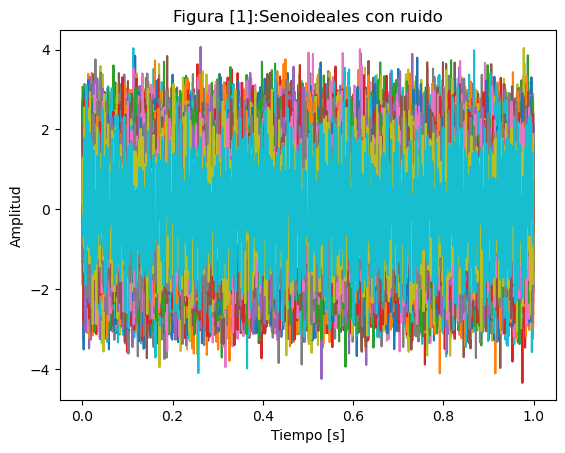

In [5]:
ttmatrizada,xxmatrizada=mi_funcion_sin2(vmax=amplitud, dc=0, ff=Ω1, ph=0, nn=N, fs=fs) #Senoideales en matriz con ruido en frecuencia
Xxruido=xxmatrizada+namatrizada #senoideal con ruido 
plt.figure()
plt.plot(ttmatrizada,Xxruido) #Grafico de senoideales con ruido en frecuencia y desfase 
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.title('Figura [1]:Senoideales con ruido')

Lo relevante de este experimento es que en el gráfico se representan $200$ senoides, cada una con $1000$ muestras, conformando así un vector de tamaño $N \times R$. Este detalle resulta fundamental, ya que a partir de esta estructura deben definirse tanto el análisis del comportamiento de las ventanas como los cálculos de la FFT, de modo que los resultados conserven coherencia y sentido. Para el estudio de las señales se van a utilizarcomo ventanas, la ventana rectangular, la ventana de hanning, la ventana de Blackman y la ventana de flat top, estas fueron programadas de las siguiente manera: 


In [6]:
xxRec=Xxruido    #usando ventana rectangular implicita 
xxwH= Xxruido*wH[:, None] #usando ventana de hanning
xxwBH=Xxruido*wBH[:, None]#usando ventana de Blackman
xxwFT=Xxruido*wFT[:, None]#usando ventana de flat top

Lo primero que nos interesa es poder graficar en el dominio de la frecuencia para poder analizar los lobulos de las ventanas y poder estudiar asi que estimador es mas probable que obtengamos 

In [7]:
ffm=np.fft.fftfreq(nfft, ts) #Tira de frecuencias para escala dB
FFTxxRec=fft(xxRec,axis=0)/N  #Fft de la  ventana rectangular implicita 
FFTxxwH=fft(xxwH,axis=0)/N  #Fft de la  ventana hanning
FFTxxBH=fft(xxwBH,axis=0)/N  #Fft de la  ventana Blackman 
FFTxxFT=fft(xxwFT,axis=0)/N  #Fft de la  ventana flat top
dBRec=20*np.log10(np.abs(FFTxxRec)) #Fft en escala dB de la  ventana rectangular implicita 
dBwH=20*np.log10(np.abs(FFTxxwH))   #Fft en escala dB de la  ventana hanning
dBBH=20*np.log10(np.abs(FFTxxBH))   #Fft en escala dB de la  ventana Blackman 
dBFT=20*np.log10(np.abs(FFTxxFT))   #Fft en escala dB de la  ventana flat top

Obteniendo asi los siguientes graficos 

Text(0, 0.5, 'Amplitud [dB]')

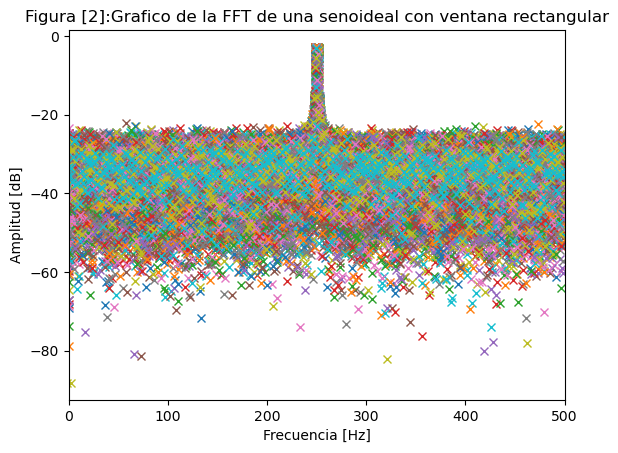

In [8]:
plt.figure()
plt.plot(ffm,dBRec,'x',label='ventana rectangular en dB')
plt.xlim([0,fs/2])
plt.title('Figura [2]:Grafico de la FFT de una senoideal con ventana rectangular')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')

Text(0, 0.5, 'Amplitud [dB]')

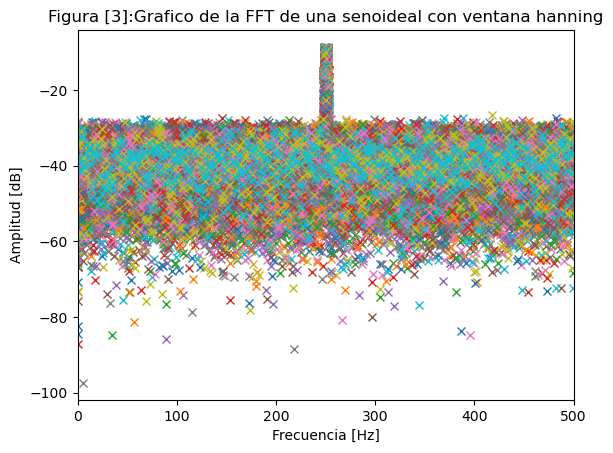

In [9]:

plt.figure()
plt.plot(ffm,dBwH,'x',label='ventana rectangular en dB')
plt.xlim([0,fs/2])
plt.title('Figura [3]:Grafico de la FFT de una senoideal con ventana hanning')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')


<img src="./Figura4.jpg" style="display:block; margin-left:auto; margin-right:auto;" width="600" /> 

Ahora veamos que pasa si tengo un desplazamiento mas chico como 0,5

Text(0, 0.5, 'Amplitud [dB]')

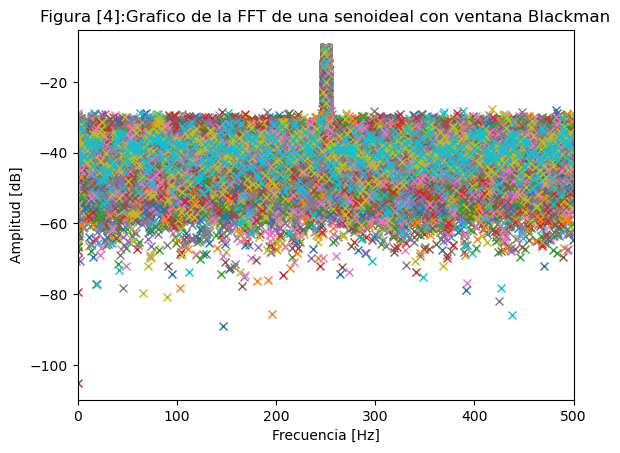

In [10]:
plt.figure()
plt.plot(ffm,dBBH,'x',label='ventana rectangular en dB')
plt.xlim([0,fs/2])
plt.title('Figura [4]:Grafico de la FFT de una senoideal con ventana Blackman')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')


Text(0, 0.5, 'Amplitud [dB]')

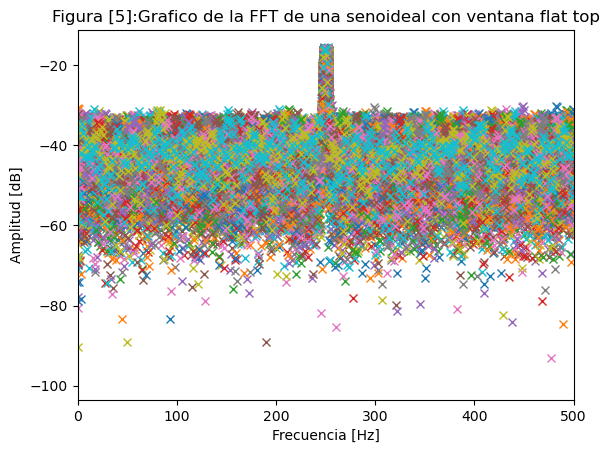

In [11]:
plt.figure()
plt.plot(ffm,dBFT,'x',label='ventana rectangular en dB')
plt.xlim([0,fs/2])
plt.title('Figura [5]:Grafico de la FFT de una senoideal con ventana flat top')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')

Analizar aca los graficos conrespecto a cual se ve mas finito y largo y cual mas ancho y corto

Adicionalmente se realizo el mismo estudio con zero padding 

In [12]:
nfftp=10*N
FFTxxRec2=fft(xxRec,n=nfftp, axis=0)/N  #Fft de la  ventana rectangular implicita y zero padding 
FFTxxwH2=fft(xxwH,  n=nfftp, axis=0)/N  #Fft de la  ventana hanning y zero padding
FFTxxBH2=fft(xxwBH, n=nfftp, axis=0)/N  #Fft de la  ventana Blackman y zero padding
FFTxxFT2=fft(xxwFT, n=nfftp, axis=0)/N  #Fft de la  ventana flat top y zero padding
ffm2 = np.fft.fftfreq(nfftp, d=ts)     #Tira de frecuencias  con zero padding

Obteniendo asi los siguientes graficos 

Text(0, 0.5, 'Amplitud [dB]')

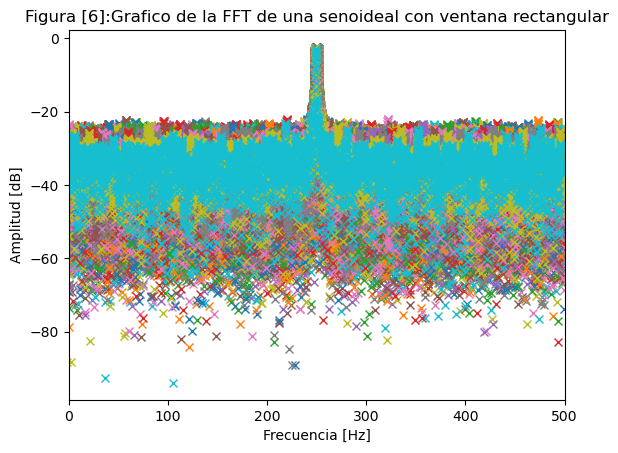

In [13]:

plt.figure()
plt.plot(ffm2,20*np.log10(np.abs(FFTxxRec2)),'x',label='ventana rectangular en dB')
plt.xlim([0,fs/2])
plt.title('Figura [6]:Grafico de la FFT de una senoideal con ventana rectangular')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')


Text(0, 0.5, 'Amplitud [dB]')

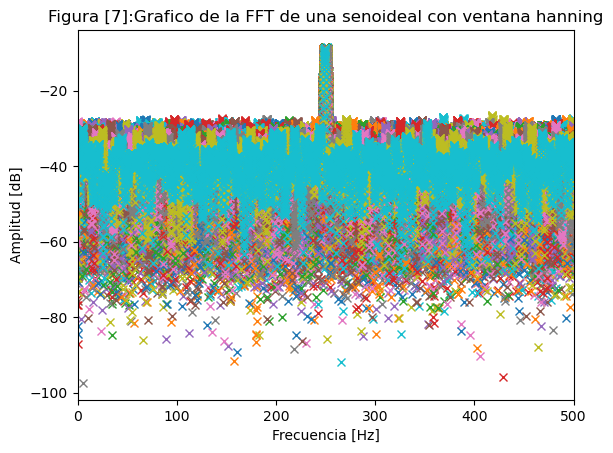

In [14]:
plt.figure()
plt.plot(ffm2,20*np.log10(np.abs(FFTxxwH2)),'x',label='ventana rectangular en dB')
plt.xlim([0,fs/2])
plt.title('Figura [7]:Grafico de la FFT de una senoideal con ventana hanning')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')

Text(0, 0.5, 'Amplitud [dB]')

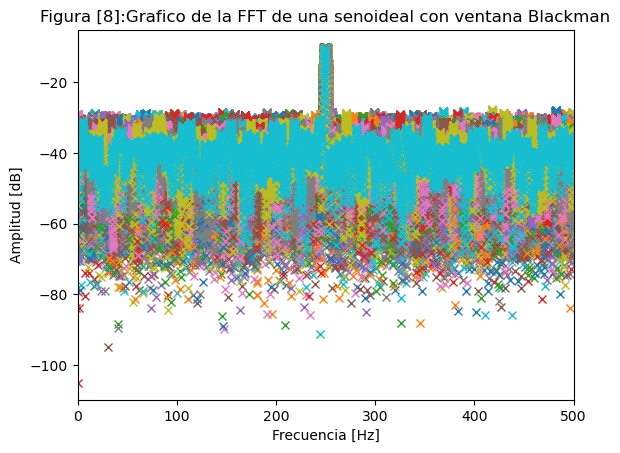

In [15]:
plt.figure()
plt.plot(ffm2,20*np.log10(np.abs(FFTxxBH2)),'x',label='ventana rectangular en dB')
plt.xlim([0,fs/2])
plt.title('Figura [8]:Grafico de la FFT de una senoideal con ventana Blackman')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]')

Text(0, 0.5, 'Amplitud [dB]')

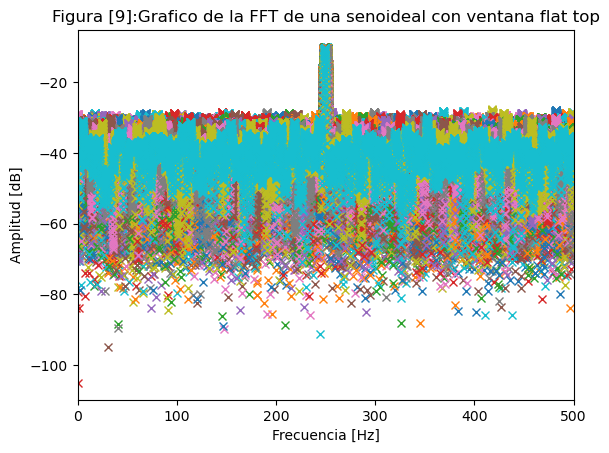

In [16]:
plt.figure()
plt.plot(ffm2,20*np.log10(np.abs(FFTxxBH2)),'x',label='ventana rectangular en dB')
plt.xlim([0,fs/2])
plt.title('Figura [9]:Grafico de la FFT de una senoideal con ventana flat top')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Amplitud [dB]') 

Explicar aca lo de los secundarios 

Estimadores de Amplitud: 

In [17]:
EERec=dBRec[N//4, :] #tira del valor maximo de frecuencia para ventana rectangular
EEwH  =dBwH[N//4, :] #tira del valor maximo de frecuencia para ventana hanning
EEBH  =dBBH[N//4, :] #tira del valor maximo de frecuencia para ventana Blackman 
EEFT  =dBFT[N//4, :] #tira del valor maximo de frecuencia para ventana ventana flat top


Text(0.5, 1.0, 'Figura [13]:Histograma de energía estimada para ventana flat top')

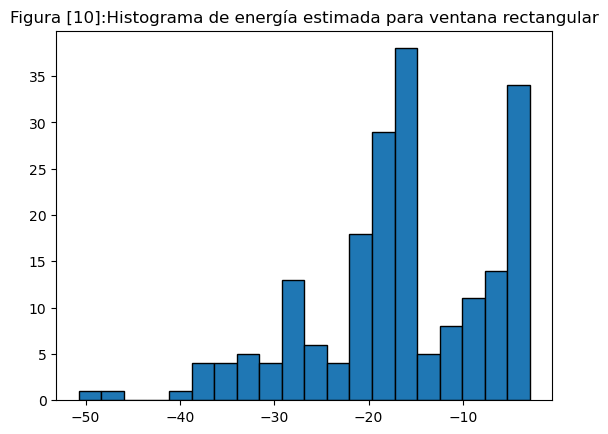

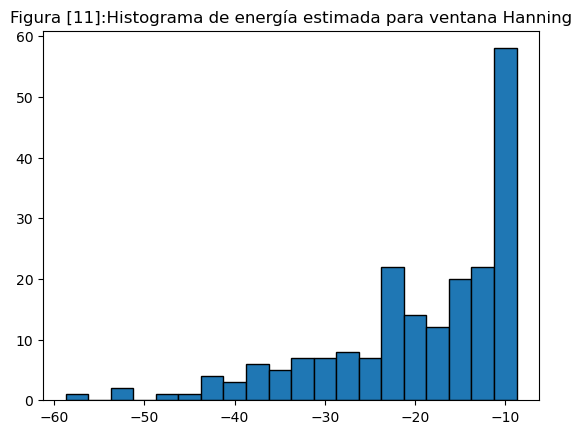

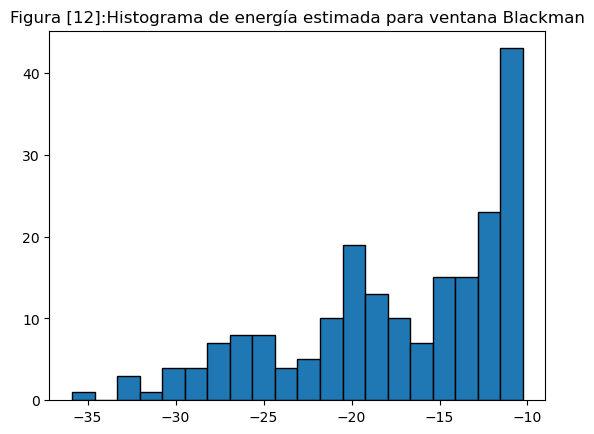

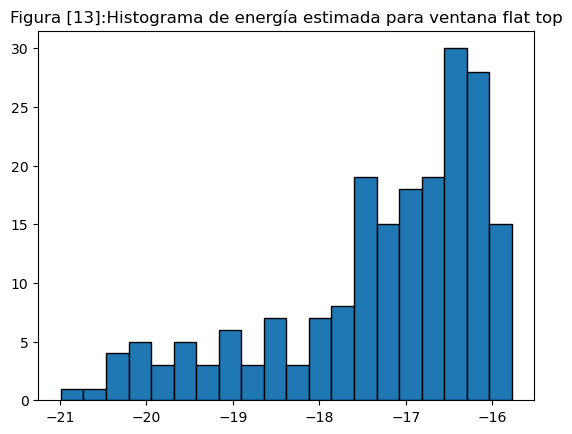

In [18]:
#Graficos con sesgo 
plt.figure()
plt.hist(EERec, bins=20, edgecolor='k')
plt.title("Figura [10]:Histograma de energía estimada para ventana rectangular")

plt.figure()
plt.hist(EEwH, bins=20, edgecolor='k')
plt.title("Figura [11]:Histograma de energía estimada para ventana Hanning")

plt.figure()
plt.hist(EEBH, bins=20, edgecolor='k')
plt.title("Figura [12]:Histograma de energía estimada para ventana Blackman")

plt.figure()
plt.hist(EEFT, bins=20, edgecolor='k')
plt.title("Figura [13]:Histograma de energía estimada para ventana flat top")

Text(0.5, 1.0, 'Figura [17]:Histograma de energía estimada para ventana flat top sin sesgo')

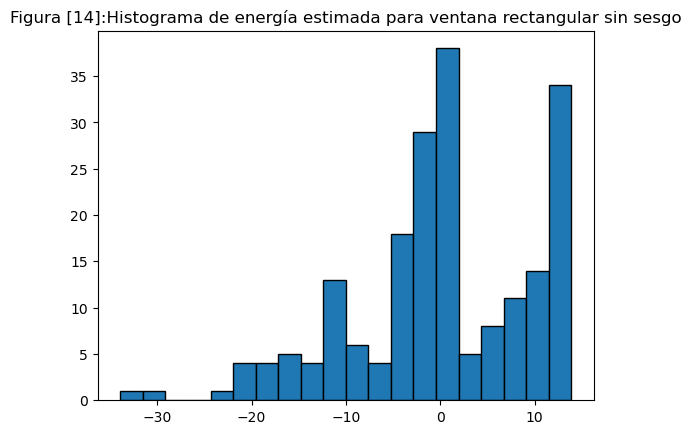

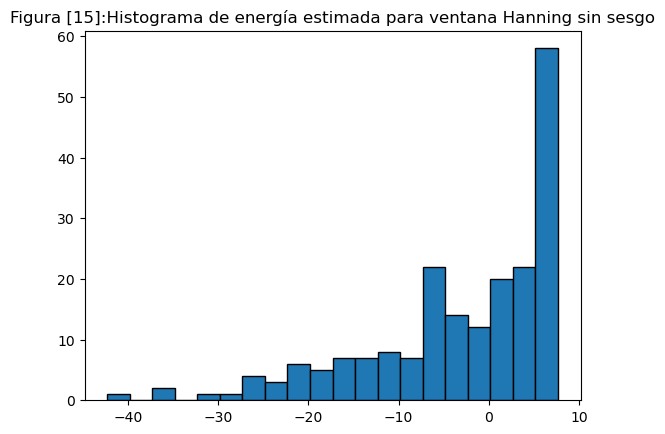

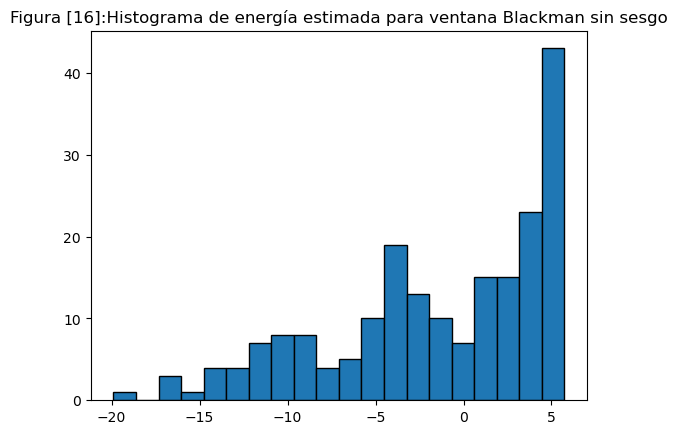

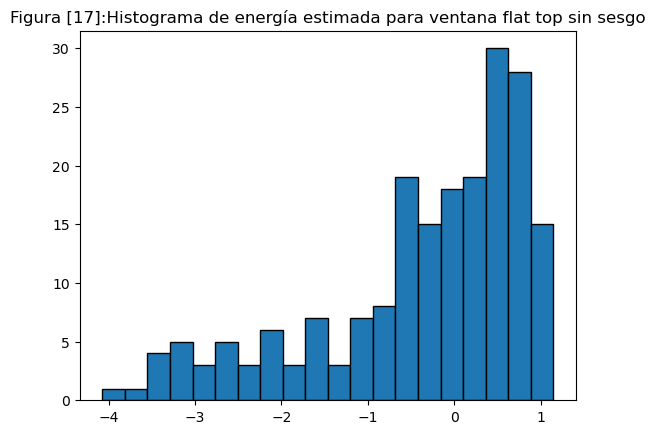

In [19]:
#Graficos sin sesgo 
plt.figure()
plt.hist(EERec-np.median(EERec), bins=20, edgecolor='k')
plt.title("Figura [14]:Histograma de energía estimada para ventana rectangular sin sesgo")

plt.figure()
plt.hist(EEwH-np.median(EEwH), bins=20, edgecolor='k')
plt.title("Figura [15]:Histograma de energía estimada para ventana Hanning sin sesgo")

plt.figure()
plt.hist(EEBH-np.median(EEBH), bins=20, edgecolor='k')
plt.title("Figura [16]:Histograma de energía estimada para ventana Blackman sin sesgo")

plt.figure()
plt.hist(EEFT-np.median(EEFT), bins=20, edgecolor='k')
plt.title("Figura [17]:Histograma de energía estimada para ventana flat top sin sesgo")

Estimador de frecuencia:

In [23]:
EFRec=np.argmax(np.abs(FFTxxRec[:N//2+1])) #Estimador de frecuencia de la  ventana rectangular implicita  
EFxxwH=np.argmax(np.abs(FFTxxwH[:N//2+1])) #Estimador de frecuencia de la  ventana hanning
EFxxBH=np.argmax(np.abs(FFTxxBH[:N//2+1])) #Estimador de frecuencia de la  ventana Blackman
EFxxFT=np.argmax(np.abs(FFTxxFT[:N//2+1])) #Estimador de frecuencia de la  ventana flat top

FeRec=EFRec*dF #indice de frecuencia para ventana rectangular
FewH=EFxxwH*dF #indice de frecuencia para ventana hanning
FeBH=EFxxBH*dF #indice de frecuencia para ventana Blackman
FeFT=EFxxFT*dF #indice de frecuencia para ventana flat top

 ----- Estimador de frecuencia POR REALIZACION y PROMEDIO -----
 tomo solo la mitad positiva de la FFT (filas 0..N//2) -> shape (N//2+1, R)

In [24]:
binsRec  = np.abs(FFTxxRec[:N//2+1, :])
binswH   = np.abs(FFTxxwH[:N//2+1, :])
binsBH   = np.abs(FFTxxBH[:N//2+1, :])
binsFT   = np.abs(FFTxxFT[:N//2+1, :])
# argmax por columna (axis=0) -> índices por realización
EFRec_idx = np.argmax(binsRec, axis=0)
EFwH_idx  = np.argmax(binswH,  axis=0)
EFBH_idx  = np.argmax(binsBH,  axis=0)
EFFT_idx  = np.argmax(binsFT,  axis=0)
# pasar índices a Hz
FeRec = EFRec_idx * dF
FewH  = EFwH_idx  * dF
FeBH  = EFBH_idx  * dF
FeFT  = EFFT_idx  * dF

In [25]:
print("Promedio estimado de frecuencia (mean) por ventana:")
print("  Rectangular : {:.4f} Hz".format(np.mean(FeRec)))
print("  Hanning      : {:.4f} Hz".format(np.mean(FewH)))
print("  Blackman     : {:.4f} Hz".format(np.mean(FeBH)))
print("  Flat Top     : {:.4f} Hz".format(np.mean(FeFT)))

Promedio estimado de frecuencia (mean) por ventana:
  Rectangular : 249.9800 Hz
  Hanning      : 249.9750 Hz
  Blackman     : 249.9750 Hz
  Flat Top     : 249.9900 Hz


sesgo relativo a la frecuencia nominal Ω0

In [26]:
print("\nSesgo (mean - Ω0):")
print("  Rectangular : {:.4f} Hz".format(np.mean(FeRec) - Ω0))
print("  Hanning      : {:.4f} Hz".format(np.mean(FewH)  - Ω0))
print("  Blackman     : {:.4f} Hz".format(np.mean(FeBH)  - Ω0))
print("  Flat Top     : {:.4f} Hz".format(np.mean(FeFT)  - Ω0))



Sesgo (mean - Ω0):
  Rectangular : -0.0200 Hz
  Hanning      : -0.0250 Hz
  Blackman     : -0.0250 Hz
  Flat Top     : -0.0100 Hz


### Conclusiones


Estimación de amplitud:Flattop suele producir menor bias en la estimación de amplitud (está diseñada para medición de amplitud). En los CSV lo verás con bias cercano a 0 en comparación con las otras ventanas.
Rectangular:suele producir mayor varianza y mayor sensibilidad a leakage (los sidelobes son grandes), por lo que la estimación puede estar sesgada si hay leakage desde señales cercanas o por la no coincidencia exacta frecuencia-bin.
Blackman-Harris reduce mucho las sidelobes (mejor para detectar componentes débiles), pero su main-lobe es más ancho → peor resolución de frecuencia y puede dar mayor varianza en amplitud comparado con flattop.Estimación de frecuencia
Estimación de frecuencia:
Rectangular: tiende a dar mejor resolución (menor varianza de estimación de frecuencia) cuando no hay mucho noise/leakage, porque el main-lobe es más estrecho. Sin embargo, por sus altos sidelobes puede ser afectada si hay energía cercana.
Blackman-Harris y ventanas con main-lobe más ancho → mayor varianza en estimación de frecuencia (peor resolución), aunque ayudan contra interferencias/sidelobes.
Zero-padding: aumenta la densidad de bins. En la tabla de zero-padding se ve claramente que aumentar Nfft reduce el sesgo medio del estimador bin (porque el bin se acerca más a la frecuencia real).
Elegir una ventana es una decisión de compromiso: ventanas con lobulo principal estrecho (p. ej. rectangular) dan mejor resolución en frecuencia pero peor atenuación de lobulos secundario (más leakage); ventanas con lobulos secundarios pequeños (Blackman-Harris, Flattop) reducen leakage y bias en mediciones de amplitud pero ensanchan elv (peor resolución). Esto explica por qué flattop te da menos sesgo en amplitud mientras que rectangular/hann puede dar menor varianza en frecuencia cuando no hay leakage.

### Autoevaluación del aprendizaje


Autoevaluación del aprendizaje

Indicar una opción:

Resolví la tarea, pero tengo dudas, del bonus






Responder:
¿Qué aprendiste al hacer esta tarea? 
¿Qué te quedó claro? 
¿Qué te sigue costando? 

Indicar si se utilizó IA:
Sí, usé chatGPT.
En caso afirmativo, indicar una opción o varias:
Escritura: Me ayudó a mejorar la coherencia y la cohesión de mis textos, además de corregir faltas de ortografía, ya que en este editor de texto no cuento con las líneas rojas que me indiquen si escribí algo mal. Generalmente lo utilizo con ese propósito.